# ДЗ №2 - обучение модели трехслойного перцептрона методом градиентного спуска

## Теоретическое задание
**Вывод функции ошибки для задачи регрессии в предположении, что целевая переменная подчиняется распределению Лапласа**  
Дан набор данных:
$$
\{x_i, t_i\}_{i=1}^N
$$
Модель регресии:
$$
y=\theta^T\phi(x)
$$
Воспользуемся вероятностным определением функции ошибки и методом максимального правдоподобия(Maximum Likelihood). Распределение Лапласа является экспоненциальным, поэтому удобнее сразу перейти к логарифмической фукнции правдоподобия
$$
t|x \sim Laplace(\theta^T\phi(x), \beta) 
$$
<img src="files/mae.jpg">
Как видно, для целевой переменной, распределенной по Лапласу, функцией ошибки является MAE (mean absolute error).

**В том же предположении относительно распределения целевой переменной вывод формы функции потерь с условием лапласовского априорного распределения параметров модели**  
Максимальная апостериорная вероятность (MAP) считается, пользуясь байесовским выводом, с учетом априорной вероятности распределения параметров $\theta$.
$$
P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}
$$
Применяем ML метод. Первый множитель числителя уже был посчитан ранее, а множитель в знаменателе переходит в константу. Остается найти чем равен второй множитель числителя. Так как $\theta$ тоже подчиняются распределению лапласа, то:
<img src="files/aposterior.jpg">
Окончательно выбирая среднее значение $\theta: m=0$ получаем:
<img src="files/l1.jpg">
Таким образом, получилась функция ошибки MAE с L1 регуляризацией.

## Текстовое описание
Целью обучения модели является классификация изображений датасета **MNIST**. Датасет представляет собой набор рукописных цифр с фиксированным размером изображения 28х28, предварительно разделенный на тренировочную (**x_train, y_train**) и тестовую выборки (**x_test, y_test**). Задача модели - определить цифру, соответствующую произвольному изображению из тестового набора данных

Каждое изображение состоит из 28х28=784 пикселей, где каждому пикселю соотвествует значение от 0 до 255 (0 - черный, 255 - белый). В качестве признакового описания одного изображения будет использоваться строка из 784 цифр от 0 до 1, полученная приведением исходной матрицы к строке и нормированием. Целевая переменная - значение от 0 до 9, соотвествующее правильной цифре на изображении.

## Трехслойный перцептрон
Трехслойный перцептрон (один скрытый слой) - один из самых простых видов нейронных сетей, который можно представить формулой
$$
F(x) = \Psi\left(\phi\left( {x}\cdot\theta_1 + b_1 \right)\cdot\theta_2 + b_2\right),
$$
А также наглядным изображением вида
<img src="files/perceptron.jpg">
Рассмотрим подробнее эту модель и её работу на одной входной строке данных (в нашем случае - строка, соответсвующая одному изображению).

Первый (**входной слой**) - это наша исходная строка, состоящая из $N_1$ чисел. С помощью первой матрицы параметров $\theta_1$ и вектора $b_1$ строка преобразуется к строке, как правило, другого размера $N_2$. Эта новая получившаяся строка представляет собой уже второй (**скрытый**) слой перцептрона.
С помощью функции активации $\phi$ (поточечная функция для строки данных) мы избавляемся от обычной линейной модели. Результат функции активации - выход скрытого слоя.  
Далее аналогично переходу от входного к скрытому слою, с помощью матрицы параметров $\theta_2$ и вектора $b_2$ попадаем на третий (**выходной слой**). Снова применяем функцию активации, на этот раз $\Psi$ и получаем окончательное значение $F(x)$. 

## Функция ошибки
Наша задача представляет собой задачу многоклассовой классификации с количеством классов: 10. Для такого рода задач применяется функция ошибки мультиномиальная кросс-энтропия(**multinomial cross entropy**).

Для начала разберемся, как выглядит представление целевой переменной и результат работы перцептрона. Для подсчета функции ошибки и классификации изображения используется **one-hot encoding**: каждому изображению соотвествует строка из 10 чисел, каждое из которых определяет вероятность изображения быть той или иной цифрой (в коде будут представлены примеры).

Тогда функция ошибки записывается в виде
$$
{\mathscr{L}}\left(\hat{y},y\right) = -\sum_{j=1}^{K}{y_j*ln\left(\hat{y}_j\right)},
$$
где $\hat{y}=F(x)$, а $y$ - целевая переменная.  
Так как все кроме одного (соответсвующего правильному значению) $y_j$ равны 0, а один из них равен 1, то функция ошибки записывается в более простом виде:
$$
{\mathscr{L}}\left(\hat{y},y\right) = -ln\left(\hat{y}_y\right)
$$
## Мера качества модели
Функция ошибки может дать лишь какое-то число, по которому невозможно оценить качество модели. Так как основной задачей перцептрона является правильная классификация цифры на картинке, то было бы более наглядно оценивать эффективность, используя число правильно и неправильно предсказанных результатов.

Для этого используются метрики качества, например **accuracy score**
$$
Accuracy=\frac{TP+TN}{TP+TN+FP+FN}
$$
Accuracy определяется только для одного конкретного класса **W**, по сути являясь долей правильных результатов. Для этого класса:  
**TP(True Positive)** - количество верных исходов, результатом которых стал класс **W**  
**TN(True Negative)** - количество верных исходов, результатом которых стал не класс **W**  
**FP(False Positive)** - количество неверных исходов, результатом которых стал класс **W**  
**FN(False Negative)** - количество неверных исходов, результатом которых не стал класс **W**  

## Решение
### Исследование данных
Для начала посмотрим несколько экземпляров датасета - изображения рукописных цифр.

Далее рассмотрим распределение целевой переменной. Из него видно, что все 10 цифр распределены примерно одинаково, а значит можно применить стохастический градиентный спуск.

Чтобы подготовить наши данные к обучению, во-первых, приведем данные к строчному виду, то есть заменим матрицу 28х28 одной строкой 1х784.  
Модель выдает результат в виде one-hot, рассмотрим такое представление, однако, в коде использовать его не будем, так как можно обойтись и обычным представлением целевой переменной.  
Из приведенных экземпляров датасета прослеживается, что некоторые пиксели (угловые и краевые) всегда черные. Поэтому проводим фильтрацию признаков, удаляя те, что имеют нулевую дисперсию (то есть принимают одно и то же значение).  
В заключение стоит отметить, что для удобства вычислений, а также для избежания огромных чисел, будет полезно провести нормировку. В своем коде я нормирую признаки, приводя их к значению от 0 до 1.

In [1]:
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
mnist = np.load('./mnist.npz')
x_train = mnist['x_train']
y_train = mnist['y_train']
# Обратите внимание на то, что целевая переменная в виде целых чисел от 0 до 9, в то время как в формулах,
# приведенных выше, подразумевается one-hot кодирование целевой переменной
x_test = mnist['x_test']
y_test = mnist['y_test']

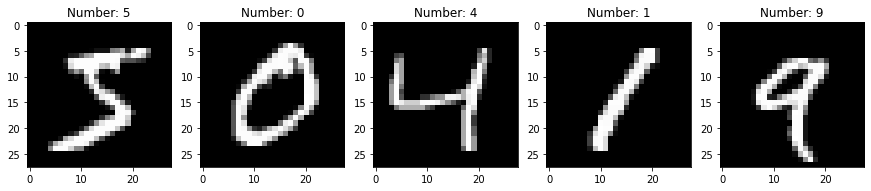

In [5]:
fig, axes = plt.subplots(1,5, figsize = (15,5)) 
for i in range(5) :
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title('Number: {}'.format(y_train[i]))

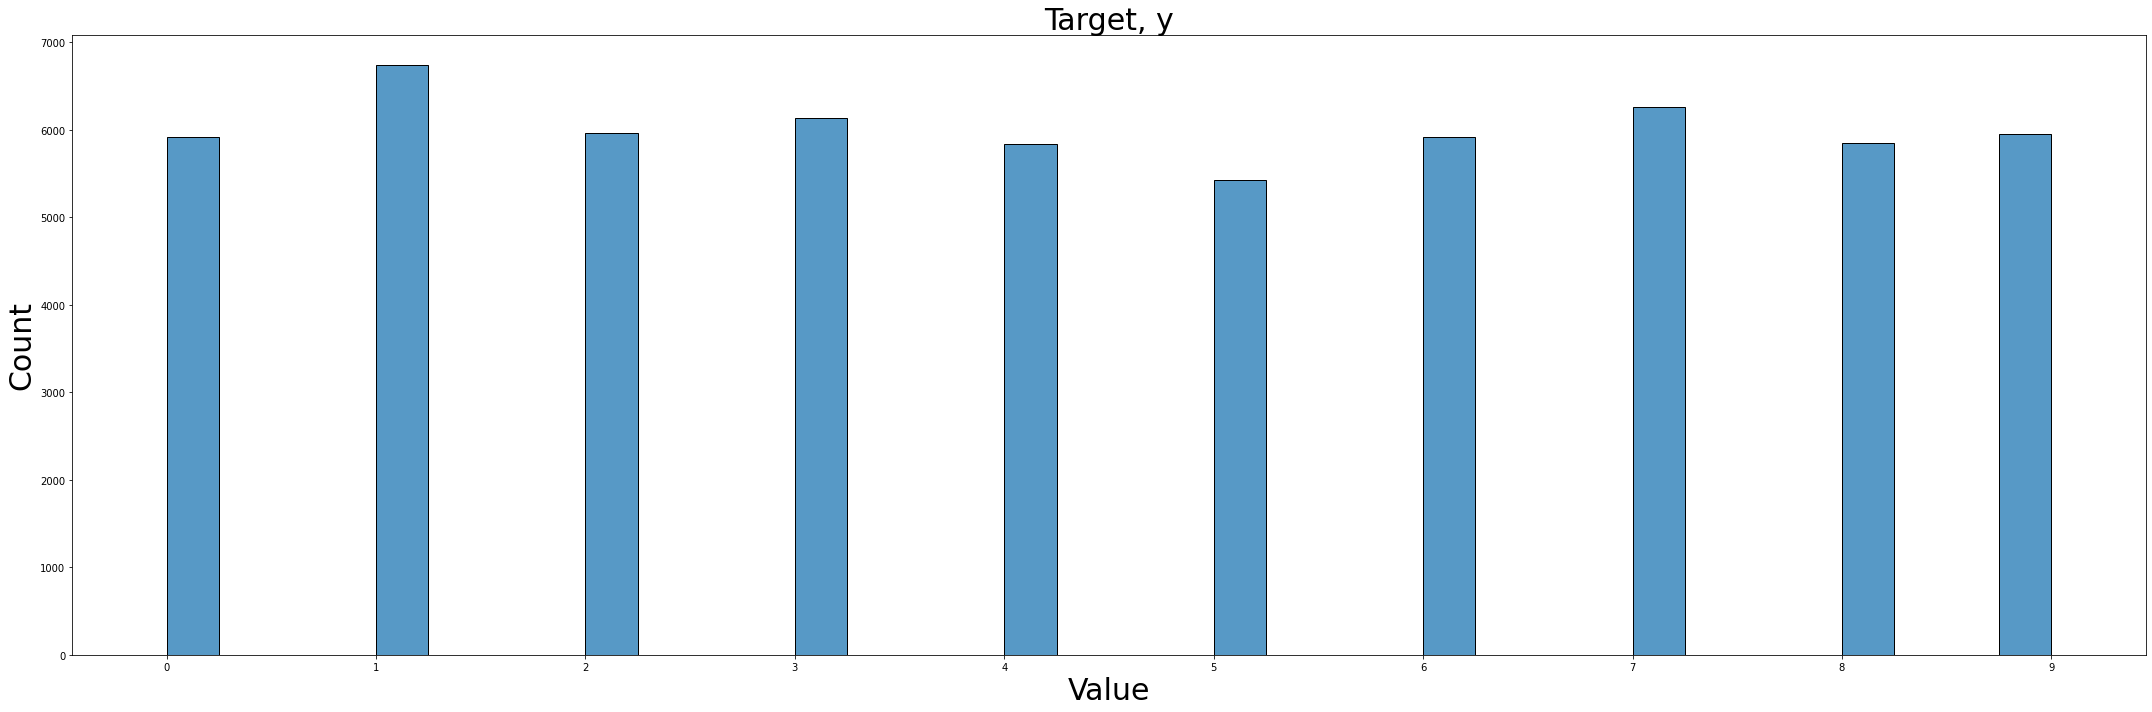

In [6]:
fig, ax = plt.subplots(figsize=(30,10))
sns.histplot(y_train)
ax.set_title('Target, y', fontsize = 30)
ax.set_xlabel('Value', fontsize = 30)
ax.set_ylabel('Count', fontsize = 30)
ax.set_xticks(np.arange(0, 10, step = 1))
plt.tight_layout()

In [7]:
print('Before row reshape')
print('x_train.shape: {}\tx_test.shape: {}'.format(x_train.shape, x_test.shape))
train_count = x_train.shape[0]
test_count = x_test.shape[0]

x_train = x_train.reshape((train_count, 28*28))
x_test = x_test.reshape((test_count, 28*28))
print('After row reshape')
print('x_train.shape: {}\tx_test.shape: {}'.format(x_train.shape, x_test.shape))

Before row reshape
x_train.shape: (60000, 28, 28)	x_test.shape: (10000, 28, 28)
After row reshape
x_train.shape: (60000, 784)	x_test.shape: (10000, 784)


In [8]:
print('Examples of one-hot decoding')
y_train_onehot = np.eye(10)[y_train]
#y_test_onehot = np.eye(10)[y_test]
for i in range(5):
    print('{} : {}'.format(y_train[i], y_train_onehot[i]))

Examples of one-hot decoding
5 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
1 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
useless_features = []
features_count = x_train.shape[1]
for i in range(features_count):
    if (x_train[:,i].std() == 0.0) :
        useless_features.append(i)

print('Found {} useless features: \n{}'.format(len(useless_features), useless_features))

x_train = np.delete(x_train, useless_features, axis=1)
x_test = np.delete(x_test, useless_features, axis=1)
print('Shapes after filtering features: \nTrain:{}\nTest:{}'.format(x_train.shape, x_test.shape))

Found 67 useless features: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 52, 53, 54, 55, 56, 57, 82, 83, 84, 85, 111, 112, 140, 141, 168, 476, 560, 644, 645, 671, 672, 673, 699, 700, 701, 727, 728, 729, 730, 754, 755, 756, 757, 758, 759, 780, 781, 782, 783]
Shapes after filtering features: 
Train:(60000, 717)
Test:(10000, 717)


In [10]:
max_value = x_train.max()
min_value = x_train.min()
print('Before normalization:\nx_train.min: {}\tx_train.max: {}'.format(min_value, max_value))
x_train = (x_train - min_value) / (max_value - min_value)
x_test = (x_test - min_value) / (max_value - min_value)
print('After normalization:\nx_train.min: {}\tx_train.max: {}'.format(x_train.min(), x_train.max()))

Before normalization:
x_train.min: 0	x_train.max: 255
After normalization:
x_train.min: 0.0	x_train.max: 1.0


## Обучение
Класс **loss** отвечает за функцию потерь (cross-entropy) с используемыми методами backward и forward для вычисления градиента и значения функции ошибки.
$$
{\mathscr{L}}\left(\hat{y},y\right) = -ln\left(\hat{y}_y\right)
\\
\begin{equation*}
\frac{\partial \mathscr{L}}{\partial \hat{y}} =
\begin{cases}
-\frac{1}{\hat{y}_i}, i=y
\\
0, i\neq y
\end{cases}
\end{equation*}
$$

Класс **Linear** предназначен для линейной части. Для удобства вычислений внутри класса добавляется единичный столбец к данным, чтобы не считать отдельно градиент для вектора $b$.  
Метод forward возвращает произведения входа на матрицу параметров $\theta$, а метод backward возвращает производную по $\theta$, если в качастве аргумента diff указано 'theta', или производную по $X$, если в качестве аргумента diff указано 'data'.
$$
y=X\cdot\theta+b
\\
\frac{\partial y}{\partial \theta}=X
\\
\frac{\partial y}{\partial X}=\theta
$$
Все производные здесь и далее написаны с точностью до транспонирования.

Класс **Activation** отвечает за функцию активации $\phi$ из формулы трехслойного перцептрона. Мною была выбрана функция **Relu**. Методы backward и forward возвращают соотвествующие градиент и активацию.
$$
\begin{equation*}
\phi(h_i) =
\begin{cases}
h_{ij}, h_{ij}>0
\\
0, h_{ij}\leq0
\end{cases}
\end{equation*}
$$
$$
\begin{equation*}
\frac{\partial \phi}{\partial h_i}=
\begin{cases}
1, h_{ij}>0
\\
0, h_{ij}\leq0
\end{cases}
\end{equation*}
$$

Класс **Softmax** предназначен для последней активации $\Psi$ выходного слоя. Методы backward и forward возвращают соотвествующие градиент и активацию.
$$
\Psi(h_i) = \frac{e^{h_i}}{\sum_{j=1}^{K}{e^{h_j}}}
\\
\frac{\partial \Psi}{\partial h}=s_i\cdot(\delta_{ij}-s_j)
$$
$\delta_{ij}$ - символ Кронекера, $s_i=\Psi(h_i)$ - сохраненная при прямом проходе активация.

Класс **Perceptron** собирает всю модель трехслойного перцептрона вместе. Метод forward возвращает значение модели по входным данным. Метод backward не используется, так как градиенты по обеим матрицам параметров считаются отдельно в функции **backprop**.

In [11]:
class Differentiable:
    def __init__(self):
        self.state = None
        pass
    
    def forward(self, **kwargs):
        raise NotImplementedError()
    
    def backward(self, **kwargs):
        raise NotImplementedError()

In [12]:
class loss(Differentiable):
    def __init__(self):
        super(loss, self).__init__()
    
    def forward(self, **kwargs):
        
        loss_value = 0.0
        y = kwargs['y']  #not one hot
        y_pred = kwargs['y_pred']
        dim = y.shape[0]
        for i in range(dim) :
            if y_pred[i][y[i]] < 10e-20 :
                print (y_pred[i][y[i]])
            loss_value -= np.log(y_pred[i][y[i]])
                
        return loss_value / dim
    
    
    def backward(self, **kwargs):

        y = kwargs['y']  #not one hot
        y_pred = kwargs['y_pred']
        dim = y.shape[0]
        
        partial_grad = np.zeros_like(y_pred)
        
        for i in range(dim) :
            partial_grad[i][y[i]] = 1.0 / y_pred[i][y[i]]
        
        return partial_grad

In [32]:
class Linear(Differentiable):
    def __init__(self, output_dim):
        super(Linear, self).__init__()
        self.theta = None
        self.output_dim = output_dim
        self.X_ext = None
    
    def __call__(self, X):
        return self.forward(X)
    
    def backward(self, **kwargs):
        
        if kwargs['diff'] == 'theta' :
            partial_grad = self.X_ext
        elif kwargs['diff'] == 'data' :
            partial_grad = self.theta[1:,] #without bias
        else :
            raise ValueError
            
        return partial_grad
    
    def forward(self, X):
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if (self.theta is None):
            input_dim = X.shape[1] + 1
            shape = (input_dim, self.output_dim)
            self.theta = np.random.normal(0, 1.0 / input_dim, shape) #init theta from normal distribution
                                                                    #with (1.0/input_dim) dispertion
                                                                    #and 0 mean
        
        X1 = np.c_[np.ones(len(X)), X]
        self.X_ext = X1
        
        y_pred = np.dot(X1, self.theta)
        return y_pred

In [14]:
class Activation(Differentiable):
    def __init__(self):
        super(Activation, self).__init__()
        self.data = None
    
    def __call__(self, **kwargs):
        return self.forward(X=kwargs['X'])
    
    def backward(self, **kwargs):
        
        num = kwargs['num']
        classes_count = self.data.shape[1]
        partial_grad = np.zeros((classes_count, classes_count))
        for i in range(classes_count) :
            partial_grad[i][i] = int(self.data[num][i] > 0)
                
        return partial_grad
    
    def forward(self, **kwargs):
        
        y = kwargs['X']
        y[y < 0] = 0
        self.data = y
        
        return y

In [15]:
class Softmax(Differentiable):
    def __init__(self):
        super(Softmax, self).__init__()
        self.data = None
    
    def __call__(self, **kwargs):
        return self.forward(X=kwargs['X'])
    
    def backward(self, **kwargs):
        
        num = kwargs['num']
        classes_count = self.data.shape[1]
        partial_grad = np.zeros((classes_count, classes_count))
        for i in range(classes_count) :
            for j in range (classes_count) :
                delta = int(i == j)
                partial_grad[i][j] = self.data[num][i] * (delta - self.data[num][j])
        
        return partial_grad
    
    def forward(self, **kwargs):
       
        X = kwargs['X']
        dim = X.shape[0]
        
        for i in range(dim) :
            X[i] -= np.max(X[i])
            X[i] = np.exp(X[i])
            X[i] /= sum(X[i])
            
        self.data = X #cache matrix of softmax values
        
        return X

In [16]:
class Perceptron(Differentiable):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.softmax = None
        self.linear1 = None
        self.linear2 = None
        self.relu = None
    
    def __call__(self, **kwargs):
        return self.forward(X)
    
    def backward(self, **kwargs):
        raise NotImplementedError()
    
    def forward(self, **kwargs):
        
        if self.linear1 == None :
            self.linear1 = Linear(128)
        if self.relu == None :
            self.relu = Activation()
        if self.linear2 == None :
            self.linear2 = Linear(10)
        if self.softmax == None:
            self.softmax = Softmax()
        
        y1 = self.linear1(X=kwargs['X'])
        h1 = self.relu(X=y1)
        y2 = self.linear2(X=h1)
        h2 = self.softmax(X=y2)
        
        return h2

Функция **backprop** принимает на вход матрицы признаков, целевой переменной, модель, функцию ошибки, а также learning rate. В функции реализован алгоритм вычисления градиента **backpropogation**, предполагая что уже был выполнен прямой проход и во всех классах модели сохранены промежуточные значения.
$$
\frac{\partial \mathscr{L}}{\partial \theta_1} =
\frac{\partial \mathscr{L}}{\partial \Psi} \cdot
\frac{\partial \Psi}{\partial y_2} \cdot
\frac{\partial y_2}{\partial \phi} \cdot
\frac{\partial \phi}{\partial y_1} \cdot
\frac{\partial y_1}{\partial \theta_1}
\\
\frac{\partial \mathscr{L}}{\partial \theta_2} =
\frac{\partial \mathscr{L}}{\partial \Psi} \cdot
\frac{\partial \Psi}{\partial y_2} \cdot
\frac{\partial y_2}{\partial \theta2}
$$
Все произведения здесь сооветствуют матричному умножению.  
На выходе возвращается модель с изменеными с помощью градиента матрицами параметров $\theta_{1,2}$.

Функция **accuracy_score** возвращает вектор мер **accuracy** для всех классов.

Функция **train_loop** - цикл оптимизации параметров. Так как распределение целевой переменной оказалось примерно равномерным по всем классам и наш датасет довольно большой, то в цикле используется **стохастический градиентный спуск** с размером батчей **batch_size=500**.  
На каждом шаге выполняется прямой проход по модели перцептрона, сохраняются значения функции ошибки и accuracy. После чего вызывается функция **backprop**, обновляющая коэффициенты модели.

In [17]:
def backprop(X, y, prediction, model, loss_fn, alpha = 1e-9) :
    final_theta2_grad = np.zeros_like(model.linear2.theta)
    final_theta1_grad = np.zeros_like(model.linear1.theta)
    
    batch_size = X.shape[0]   
    for i in range(batch_size) :
        
        CE_SM_grad = np.dot(loss_fn.backward(y=y, y_pred=prediction), model.softmax.backward(num=i))
    
        linear2_grad_theta = model.linear2.backward(diff='theta')
        theta2_grad = np.dot(linear2_grad_theta.transpose(), CE_SM_grad)
        
        linear1_grad_theta = model.linear1.backward(diff='theta')
        theta1_grad = np.dot(linear1_grad_theta.transpose(), CE_SM_grad)
        linear2_grad_data = model.linear2.backward(diff='data')
        theta1_grad = np.dot(theta1_grad, linear2_grad_data.transpose())
        relu_grad = model.relu.backward(num=i)
        theta1_grad = np.dot(theta1_grad, relu_grad)
        
        final_theta2_grad +=theta2_grad
        final_theta1_grad +=theta1_grad
            
    #print('{}, {}'.format(model.linear2.theta.shape, theta2_grad.shape))
    #print('{}, {}'.format(model.linear1.theta.shape, theta1_grad.shape))        
    model.linear2.theta += final_theta2_grad / batch_size * alpha
    model.linear1.theta += final_theta1_grad / batch_size * alpha 
    return model

In [18]:
def accuracy_score(y, prediction_onehot):
    classes_count = 10
    prediction = np.zeros_like(y)
    for i in range(y.shape[0]) :
        prediction[i] = np.argmax(prediction_onehot[i])
        
    accuracies = []
    classes_count = 10
    for i in range(classes_count) :
        y_i = (y == i) 
        prediction_i = (prediction == i)
        accuracies.append(np.sum(y_i == prediction_i) / len(y_i))

    return accuracies

In [19]:
def train_loop(X, y, model, loss_fn, epochs=100):
    from sklearn.model_selection import train_test_split
    loss_history = []
    accuracy_history = []
    pbar = tqdm(total=epochs)
    alpha = 1.3e-3
    
    batch_size = 500
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=batch_size)
    for epoch in range(epochs):

        prediction = model.forward(X=X_train)
        loss_value = loss_fn.forward(y=y_train, y_pred=prediction)
        accuracy = np.mean(accuracy_score(y_train, prediction))
        
        loss_history.append(loss_value)
        accuracy_history.append(accuracy)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value, 'accuracy': accuracy})
        
        model = backprop(X_train, y_train, prediction, model, loss_fn, alpha)
    
    pbar.close()
    return loss_history, accuracy_history

In [20]:
obj_fn = loss()
model = Perceptron()
prediction = model.forward(X=x_train)
loss_history, accuracy_history = train_loop(x_train, y_train, model, obj_fn, epochs=100)

100%|████████████████████████████████████████████████████| 100/100 [01:48<00:00,  1.08s/it, loss=0.446, accuracy=0.966]


Text(0, 0.5, 'Accuracy')

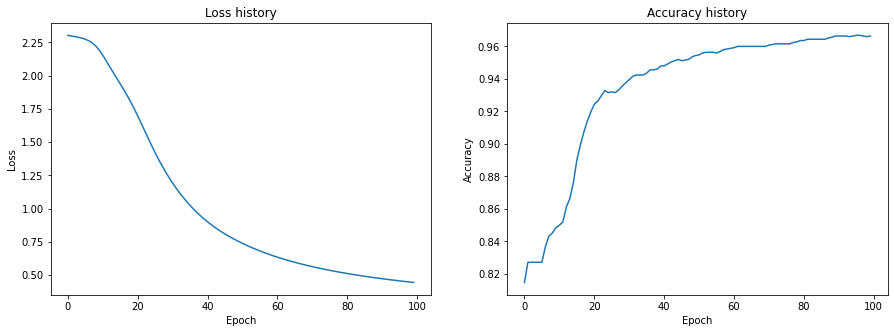

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(loss_history)
ax[0].set_title('Loss history')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].plot(accuracy_history)
ax[1].set_title('Accuracy history')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')

In [30]:
print('Result parameters\nTheta1:\n{}\nTheta2:\n{}'.format(model.linear1.theta, model.linear2.theta))

Result parameters
Theta1:
[[ 2.86011959e-02 -1.91185778e-02 -3.82255310e-03 ... -7.17110928e-02
  -3.26007252e-03  1.00477278e-02]
 [ 3.82419899e-04 -7.95883337e-04 -1.28573914e-03 ...  7.87321855e-05
   2.27513998e-04  2.85215116e-04]
 [-7.45778295e-04  1.51904979e-03 -1.11458186e-03 ...  5.26433530e-04
   2.54838378e-04 -1.63194142e-03]
 ...
 [-4.52756889e-04  8.97000277e-04 -8.90443101e-05 ...  6.44069688e-04
   1.65159409e-03  1.08010340e-03]
 [ 6.25718600e-04  2.36626074e-03 -2.52479967e-03 ... -2.44893416e-04
  -3.39125409e-03 -7.64330642e-04]
 [ 3.68832590e-04  1.32078580e-03 -2.17796440e-04 ... -1.70161942e-03
  -2.90245429e-03 -1.19033502e-03]]
Theta2:
[[-2.50695706e-01  2.28915799e-01 -1.07059254e-01 ...  1.71583654e-01
  -7.16801657e-02 -6.94949793e-02]
 [ 3.55564838e-02 -8.06687502e-02 -1.32100342e-01 ...  5.93347496e-01
  -1.38646372e-01  1.38628023e-01]
 [-1.42320187e-01  4.54145325e-01  6.29025689e-01 ...  3.15125335e-02
  -1.90868772e-02 -4.03011019e-01]
 ...
 [ 4.02638

## Проверка на тестовой выборке

In [22]:
prediction = model.forward(X=x_test)
loss_value = obj_fn.forward(y=y_test, y_pred=prediction)
accuracy = accuracy_score(y_test, prediction)

In [23]:
print('Loss value on train dataset: {:.4f}\nLoss value on test dataset: {:.4f}'.format(loss_history[-1], loss_value))

Loss value on train dataset: 0.4457
Loss value on test dataset: 0.6741


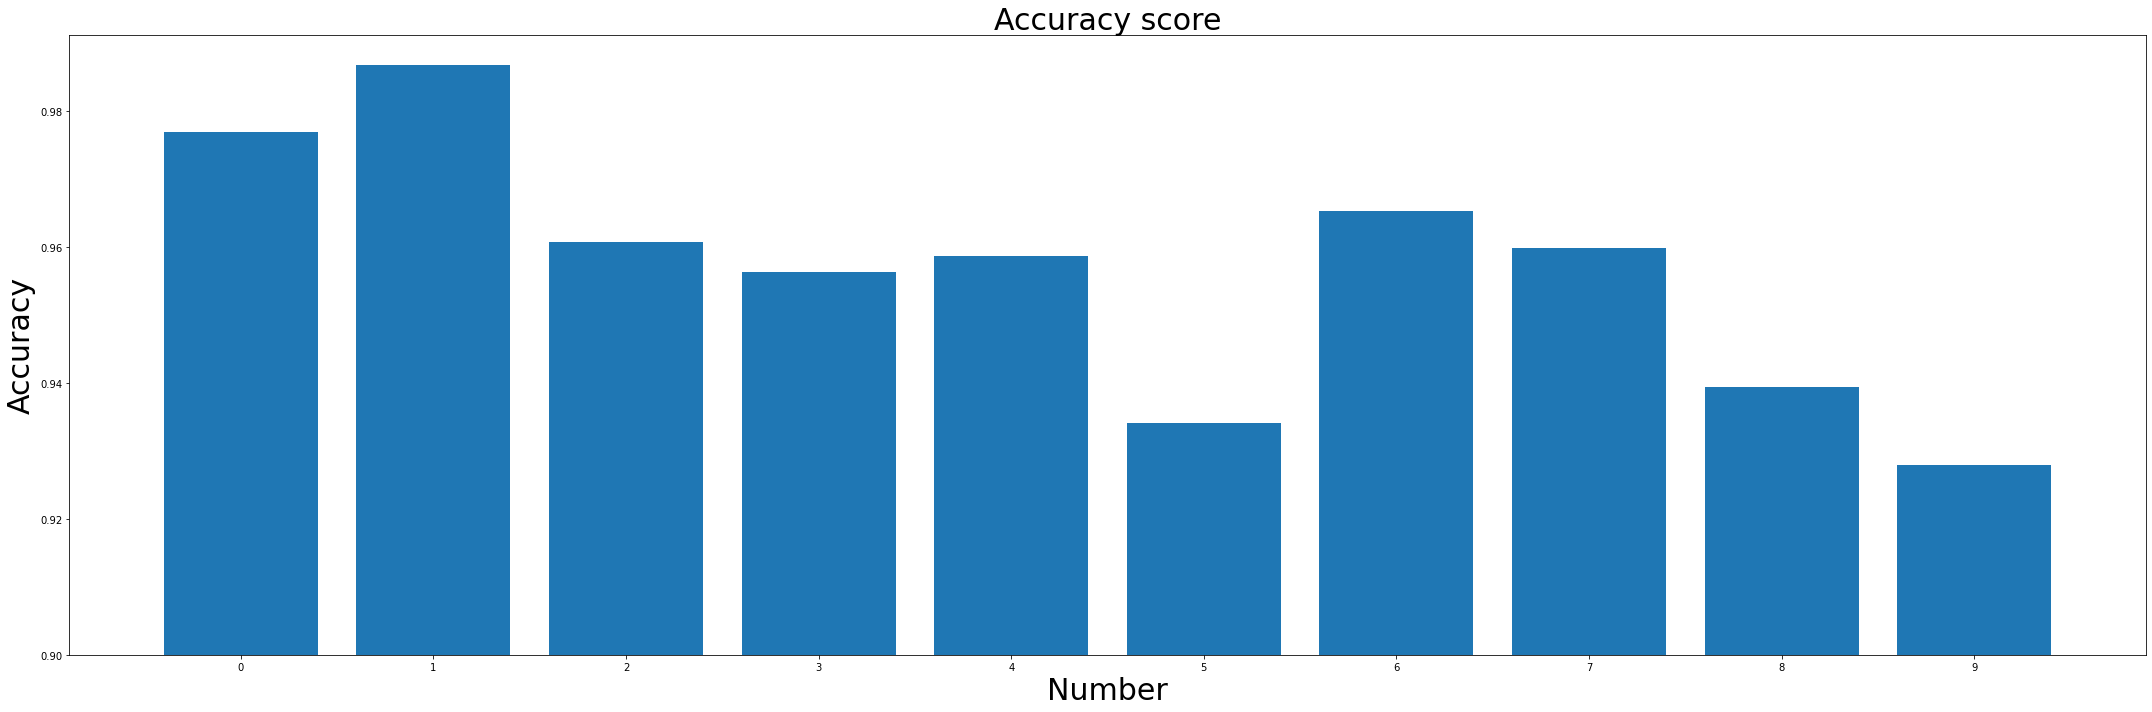

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
numbers = np.arange(0, 10, step=1)
bottom = 0.9
ax.bar(numbers, np.array(accuracy)-bottom, bottom=bottom)
ax.set_title('Accuracy score', fontsize = 30)
ax.set_xlabel('Number', fontsize = 30)
ax.set_ylabel('Accuracy', fontsize = 30)
ax.set_xticks(numbers)
plt.tight_layout()

In [33]:
print('Average accuracy score on test dataset: {:.3f}'.format(np.mean(accuracy)))
print('Best accuracy:\nNumber: {}\tAccuracy:{}'.format(1, accuracy[1]))
print('Worst accuracy:\nNumber: {}\tAccuracy:{}'.format(9, accuracy[9]))

Average accuracy score on test dataset: 0.957
Best accuracy:
Number: 1	Accuracy:0.9868
Worst accuracy:
Number: 9	Accuracy:0.9279


## Итог
Модель трехслойного перцептрона оказалось подходящей для задачи классификации изображений датасета MNIST. Исходные данные были полными, так как распределение классов целевой переменой было равномерным, а размер датасета был достаточно большим.

Из-за различия внешнего вида цифр, не определение некоторых модель обучилась лучше, а на некоторых хуже. Лучше всего модель определяет цифру 1 - accuracy примерно 0.9868, а хуже всего цифру 9 - accuracy около 0.9279.

Среднее значение accuracy оказалось очень близким на валидационной и тренировочной выборках, поэтому можно утверждать, что модель не переобучилась. 

По истории эволюции метрики и ошибки модели было видно, что метрика вышла на плато, поэтому дальше тренировать модель не было смысла. Чтобы попытаться получить большую точность для этой модели, можно, в первую очередь, динамически изменать learning rate(alpha) с помощью learning rate scheduler.